In [2]:
import pandas as pd
import glob
import os

In [3]:
def open_evaluation_files(paths):
    
    main_df = pd.DataFrame()
    for path in paths:
        
        txt_files = glob.glob(os.path.join(path, "*.txt"))
        for file_name in txt_files:
            f = open(file_name, "r")
            lines = f.readlines()

            useful_rows = []

            for i,line in enumerate(lines):
                if line.startswith('['):
                    useful_rows.append(line.strip().split('\t'))
                else:
                    continue
            df = pd.DataFrame(useful_rows)
            main_df = main_df.append(df, ignore_index=True)
            
    main_df.columns = ['% [START_TIME - END_TIME]', 'TURN_NAME', 'EMOTION', '[V, A, D]']  
    return main_df[['TURN_NAME', 'EMOTION']]

In [31]:
path_to_session1 = ['IEMOCAP_full_release\Session1\dialog\EmoEvaluation']
session1 = open_evaluation_files(path_to_session1)

In [39]:
session1.head(3)

,TURN_NAME,EMOTION
0,Ses01F_impro01_F000,neu
1,Ses01F_impro01_F001,neu
2,Ses01F_impro01_F002,neu


# session1

In [45]:
session1.groupby("EMOTION").count()

,TURN_NAME
EMOTION,
ang,229
dis,1
exc,143
fea,12
fru,280
hap,135
neu,384
oth,1
sad,194


# Session 2

In [44]:
path_to_session2 = ['IEMOCAP_full_release\Session2\dialog\EmoEvaluation']
session2 = open_evaluation_files(path_to_session2)
session2.groupby("EMOTION").count()

,TURN_NAME
EMOTION,
ang,137
exc,210
fea,9
fru,325
hap,117
neu,362
oth,1
sad,197
sur,17


# Session 3

In [43]:
path_to_session3 = ['IEMOCAP_full_release\Session3\dialog\EmoEvaluation']
session3 = open_evaluation_files(path_to_session3)
session3.groupby("EMOTION").count()

,TURN_NAME
EMOTION,
ang,240
dis,1
exc,151
fea,2
fru,382
hap,135
neu,320
sad,305
sur,28


# Session 4

In [47]:
path_to_session4 = ['IEMOCAP_full_release\Session4\dialog\EmoEvaluation']
session4 = open_evaluation_files(path_to_session4)
session4.groupby("EMOTION").count()

,TURN_NAME
EMOTION,
ang,327
exc,238
fea,7
fru,481
hap,65
neu,258
oth,1
sad,143
sur,19


# Session 5

In [49]:
path_to_session5 = ['IEMOCAP_full_release\Session5\dialog\EmoEvaluation']
session5 = open_evaluation_files(path_to_session5)
session5.groupby("EMOTION").count()

,TURN_NAME
EMOTION,
ang,170
exc,299
fea,10
fru,381
hap,143
neu,384
sad,245
sur,18
xxx,520


# select classes

In [93]:
paths = ['IEMOCAP_full_release\Session1\dialog\EmoEvaluation',
         'IEMOCAP_full_release\Session2\dialog\EmoEvaluation',
         'IEMOCAP_full_release\Session3\dialog\EmoEvaluation',
         'IEMOCAP_full_release\Session4\dialog\EmoEvaluation',
         'IEMOCAP_full_release\Session5\dialog\EmoEvaluation']
df = open_evaluation_files(paths)

In [94]:
df.to_csv('TURN_EMOTION.csv',index=False)

In [95]:
selected_class_names = ['neu', 'hap', 'sad', 'ang']

In [96]:
df.loc[df['EMOTION'] == 'exc','EMOTION'] = 'hap'

In [97]:
selected_df = df[df['EMOTION'] == selected_class_names[0]].append(
    df[df['EMOTION'] == selected_class_names[1]]).append(
    df[df['EMOTION'] == selected_class_names[2]]).append(
    df[df['EMOTION'] == selected_class_names[3]],ignore_index=True)

In [98]:
selected_df

,TURN_NAME,EMOTION
0,Ses01F_impro01_F000,neu
1,Ses01F_impro01_F001,neu
2,Ses01F_impro01_F002,neu
3,Ses01F_impro01_F005,neu
4,Ses01F_impro01_F014,neu
...,...,...
5526,Ses05M_script03_2_M041,ang
5527,Ses05M_script03_2_M042,ang
5528,Ses05M_script03_2_M043,ang
5529,Ses05M_script03_2_M044,ang


In [99]:
selected_df.to_csv('selected_TURN_EMOTION.csv',index=False)

# check classes in selected dataset

In [100]:
selected_df['session'] = selected_df['TURN_NAME'].apply(lambda x:x[:5])

In [103]:
selected_session1 = selected_df[selected_df['session'] == 'Ses01'].drop(labels=['session'],axis=1)
selected_session2 = selected_df[selected_df['session'] == 'Ses02'].drop(labels=['session'],axis=1)
selected_session3 = selected_df[selected_df['session'] == 'Ses03'].drop(labels=['session'],axis=1)
selected_session4 = selected_df[selected_df['session'] == 'Ses04'].drop(labels=['session'],axis=1)
selected_session5 = selected_df[selected_df['session'] == 'Ses05'].drop(labels=['session'],axis=1)

In [109]:
selected_session1.to_csv('selected_session1.csv',index=False)
selected_session2.to_csv('selected_session2.csv',index=False)
selected_session3.to_csv('selected_session3.csv',index=False)
selected_session4.to_csv('selected_session4.csv',index=False)
selected_session5.to_csv('selected_session5.csv',index=False)

In [110]:
selected_df = selected_df.drop(labels=['session'],axis=1,inplace=True)

AttributeError: 'NoneType' object has no attribute 'drop'

In [111]:
print('Session 1 :')
print(selected_session1.groupby("EMOTION").count())
print('Session 2 :')
print(selected_session2.groupby("EMOTION").count())
print('Session 3 :')
print(selected_session3.groupby("EMOTION").count())
print('Session 4 :')
print(selected_session4.groupby("EMOTION").count())
print('Session 5 :')
print(selected_session5.groupby("EMOTION").count())

Session 1 :
         TURN_NAME
EMOTION           
ang            229
hap            278
neu            384
sad            194
Session 2 :
         TURN_NAME
EMOTION           
ang            137
hap            327
neu            362
sad            197
Session 3 :
         TURN_NAME
EMOTION           
ang            240
hap            286
neu            320
sad            305
Session 4 :
         TURN_NAME
EMOTION           
ang            327
hap            303
neu            258
sad            143
Session 5 :
         TURN_NAME
EMOTION           
ang            170
hap            442
neu            384
sad            245


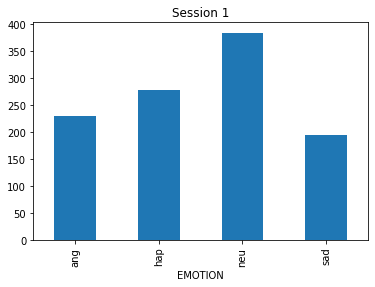

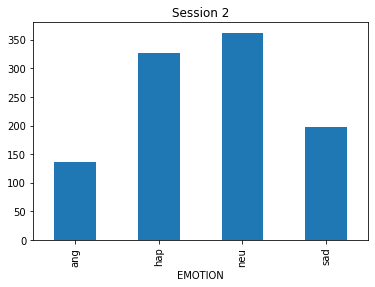

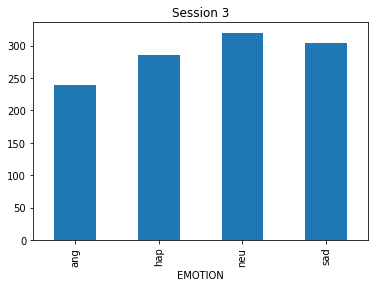

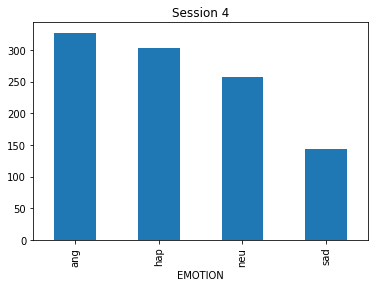

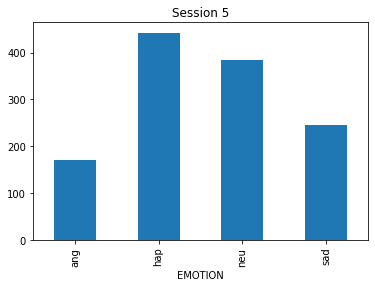

In [124]:
selected_session1.groupby("EMOTION").count().plot.bar(legend=None, title='Session 1')
selected_session2.groupby("EMOTION").count().plot.bar(legend=None, title='Session 2')
selected_session3.groupby("EMOTION").count().plot.bar(legend=None, title='Session 3')
selected_session4.groupby("EMOTION").count().plot.bar(legend=None, title='Session 4')
selected_session5.groupby("EMOTION").count().plot.bar(legend=None, title='Session 5')
plt.show()